# Тема #2. Символьные вычисления

Цель: изучить основные функции библиотеки **SymPy**, понять основные принципы ее работы.

## Установка

Для установки библиотеки используем, например, пакетный менеджер **pip**. В терминале прописываем:
```shell
python -m pip install sympy
```

## Символьные выражения

Библиотека **SymPy** используется для символьных вычислений. Она позволяет работать с символьными выражениями, совершать над ними различные преобразования, находить производные, брать интегралы и решать уравнения.

In [1]:
from sympy import symbols

In [2]:
# Создаем символы
x, y = symbols("x y")

# Записываем выражение
expr = x + y * 3

# Выводим результат
print(expr)  # x + 3*y

x + 3*y


Здесь `x` и `y` — это символы, а не числа (не переменные, например, типа `double` или `int`), поэтому Python не вычисляет выражение, а просто выводит его в символьном виде.

### Подстановка значений

Для подстановки чисел в выражение используется метод `expr.subs(old, new)`.
- `old` — заменяемый символ, число или выражение.
- `new` — новое значение или выражение, на которое производится замена.

Можно передавать словарь для замены нескольких значений сразу: `expr.subs({old1: new1, old2: new2, ...})`.

In [3]:
value = expr.subs({x: 2, y: 5})
print(value)

17


### Упрощение выражений

В SymPy выражения часто упрощаются автоматически при их создании или выводе, особенно если они включают арифметические операции с числами.
Например, выражение $$8-3\cdot \left(\frac{1}{3}+0.2\right)-10+x,$$ представленное как

In [4]:
expr = 8 - 3*(1 / 3 + 0.2) - 10 + x

будет автоматически упрощено в:

In [5]:
print(expr)

x - 3.6


Если нужно оставить выражение **в неизменном виде**, можно использовать функцию `UnevaluatedExpr`:

In [6]:
from sympy import UnevaluatedExpr as ue

x, y = symbols("x y")
expr = ue(8) - 3*(ue(1) / ue(3) + 0.2) - ue(10) + x

print(expr)

x - 3*(0.2 + 1*3**(-1)) + 8 - 10


Для упрощения выражаения существует функция `simplify()`:

In [7]:
from sympy import simplify
simplify(expr)

x - 3.6

Для перевода результата вычисления выражения в вещественный вид существует два способа `N()` и `evalf()`, они почти одинаковые, но есть небольшая разница:  

- `evalf()` — метод объекта, в котором хранится выражение.
`evalf()` вызывается на конкретном выражении и вычисляет его численное значение:  

In [8]:
import sympy as sp

x = sp.Symbol("x")
expr = sp.sin(x) + sp.exp(x)

print(expr.evalf(subs={x: 1}))

3.55975281326694


- `sp.N()` — работает так же, но это глобальная функция, а не метод объекта:

In [9]:
print(sp.N(expr, subs={x: 1}))

3.55975281326694


Она полезна, если нужно вычислить что-то без вызова метода `evalf()`.

### Раскрытие скобок

Чтобы раскрывать скобки в символьных выражениях существует метод `expand()`.

In [10]:
from sympy import symbols, sin, cos, expand

x, y = symbols('x y')

expr = ((x + 15)**3) / ((x - 2)**4)
expanded_expr = expr.expand(trig=True)

print("Исходное выражение:", expr)
print("Раскрытое выражение:", expanded_expr)

Исходное выражение: (x + 15)**3/(x - 2)**4
Раскрытое выражение: x**3/(x**4 - 8*x**3 + 24*x**2 - 32*x + 16) + 45*x**2/(x**4 - 8*x**3 + 24*x**2 - 32*x + 16) + 675*x/(x**4 - 8*x**3 + 24*x**2 - 32*x + 16) + 3375/(x**4 - 8*x**3 + 24*x**2 - 32*x + 16)


#### Некоторые параметры метода `expand()`

- `basic=True` (по умолчанию).
Раскрывает стандартные скобки в выражениях.
- `power_exp=True`.
Раскрывает степень степени.
- `power_base=True`.
Раскрывает степени с одинаковым основанием.
- `mul=True`
Раскрывает произведения.
- `log=True`
Использует логарифмические свойства.
- `trig=True`
Раскрывает тригонометрические выражения.
- `complex=True`
Разделяет выражение на действительную и мнимую часть. 

In [11]:
from sympy import I
expand((1 + I) ** 2, complex=True)  

2*I

- Пример с несколькими параметрами:

In [12]:
expand((x*y)**3 + sin(x + y), power_base=True, trig=True)

x**3*y**3 + sin(x)*cos(y) + sin(y)*cos(x)

Кроме этого можно комбинировать параметры в `expand()`, указывая только нужные.

In [13]:
expand((x*y)**3 + sin(x + y), power_base=True, trig=True)

x**3*y**3 + sin(x)*cos(y) + sin(y)*cos(x)

### Вывод выражений

Допустим у нас есть некоторое выражение

In [14]:
import sympy as sp

In [15]:
a = sp.symbols("a", real = True)
x = (sp.exp(-abs(a)**1.2) + sp.sin(a**4)) / a

Его можно вывести в консоль с использованием функции `pprint()`.
Это функция из библиотеки SymPy, которая форматирует и красиво выводит математические выражения в консоли.
Она делает вывод более читаемым, добавляя дроби, степени и другие символы в удобном формате.

In [16]:
sp.pprint(x)

               1.2
   ⎛ 4⎞    -│a│   
sin⎝a ⎠ + ℯ       
──────────────────
        a         


### Перевод символьных выражений в код $\LaTeX$

Можно перевести символьное выражение в $\LaTeX$ с помощью функции `latex()`.

In [17]:
from sympy import latex
latex_expr = latex(x)
print(latex_expr)

\frac{\sin{\left(a^{4} \right)} + e^{- \left|{a}\right|^{1.2}}}{a}


Далее отобразим результат средствами Markdown: $$\frac{\sin{\left(a^{4} \right)} + e^{- \left|{a}\right|^{1.2}}}{a}$$

Кроме этого в JupyterLab выражения могут выводиться в $\LaTeX$ автоматически.

In [18]:
x

(sin(a**4) + exp(-Abs(a)**1.2))/a

## Символьные функции, лямбда выражения

Символьные выражения можно "обернуть" в лямбда-выражения для улучшения читаемости кода и упрощения взаимодействия с ними. Вот пример, как это можно сделать:

In [19]:
import sympy as sp

In [20]:
x = sp.symbols("x")

expr = x - x**3 / 10 + x**6 / 120
y = sp.lambdify(x, expr)

point = sp.pi/6
result = y(point)
sp.pprint(result)

                        3                        6   π
- 0.000462962962962963⋅π  + 1.78612254229538e-7⋅π  + ─
                                                     6


In [21]:
print(result.evalf())

0.509415733766994


Функция `lambdify()` позволяет преобразовывать выражения SymPy в обычные функции Python.
Однако, если не указать правильный модуль, могут возникнуть ошибки, например:

In [22]:
import sympy as sp

x = sp.symbols("x")
y = sp.lambdify(x, sp.sin(x)) # По умолчанию использует NumPy

print(y(sp.pi/6))

TypeError: loop of ufunc does not support argument 0 of type Mul which has no callable sin method

Укажем `modules="sympy"`, чтобы лямбда-функция использовала SymPy для вычислений:

In [23]:
y = sp.lambdify(x, sp.sin(x), "sympy")
print(y(sp.pi/6))

1/2


## Производные

В библиотеке присутствует возможности нахождения производных.

In [24]:
import sympy as sp

In [25]:
x = sp.symbols("x")
f = x**2 + 3*x + 2
f_prime = sp.diff(f, x)

In [26]:
f

x**2 + 3*x + 2

In [27]:
f_prime

2*x + 3

Присутствует возможность нахождения частных производных.

In [28]:
x, y = sp.symbols("x y")
f = sp.lambdify((x, y), x**2 + y**2 + 3*x*y)

# Находим частную производную функции по x
f_prime_x = sp.diff(f(x, y), x)

# Находим частную производную функции по y
f_prime_y = sp.diff(f(x, y), y)

print(f"Частная производная по x: {f_prime_x}")
print(f"Частная производная по y: {f_prime_y}")

Частная производная по x: 2*x + 3*y
Частная производная по y: 3*x + 2*y


## Пределы

### Односторонние и двусторонние пределы

Для нахожения пределов существует функция `limit()`.

In [29]:
from sympy import symbols, limit

x = symbols('x')
expr = (x**2 - 1) / (x - 1)

lim = limit(expr, x, 1) # Двусторонний предел при x -> 1
print(lim)

2


Можно находить односторонние пределы, для этого необходимо указать параметр `dir="-"` или `dir="+"`:

In [30]:
lim_left = limit(expr, x, 1, dir="-")  # Слева (x → 1⁻)
lim_right = limit(expr, x, 1, dir="+") # Справа (x → 1⁺)

#### Пределы в бесконечности

Если необходимо оперировать бесконечностями, необходимо подключить `oo`.

In [31]:
from sympy import oo

In [32]:
expr = (3*x**2 + x) / (2*x**2 - 5)

lim_inf = limit(expr, x, oo) # x → ∞
lim_neg_inf = limit(expr, x, -oo) # x → -∞

print(lim_inf) # 3/2
print(lim_neg_inf) # 3/2

3/2
3/2


#### Особые случаи

Пусть существует функция $f(x) = \dfrac{1}{x}$, которая имеет два предела при $ x \to 0 $, в зависимости от направления:  

- Слева ($x \to 0^-$): $\dfrac{1}{x} \to -\infty$.  

- Справа ($x \to 0^+$): $\dfrac{1}{x} \to +\infty$.  

Так как левосторонний и правосторонний пределы не совпадают, предела в точке $ x = 0 $ не существует.

Если предел не существует, SymPy вернёт $\infty$, $-\infty$ или не сможет вычислить.

In [33]:
expr = 1 / x
print(limit(expr, x, 0, dir='+'))  # oo
print(limit(expr, x, 0, dir='-'))  # -oo
print(limit(expr, x, 0))

oo
-oo
oo


## Интегралы

В SymPy можно вычислять интегралы с помощью функции `integrate()`. Рассмотрим примеры ее использования для вычисления неопределенного и определенного интегралов.

### Неопределенный интеграл

In [34]:
from sympy import symbols, integrate

# Определим переменную
x = symbols('x')

# Интеграл от x^2
integral = integrate(x**2, x)
integral

x**3/3

### Определенный интеграл

Определенный интеграл от $x^2$ на интервале $[0, 1]$:

In [35]:
integral_definite = integrate(x**2, (x, 0, 1))
print(integral_definite)

1/3


## Уравнения и неравенства

### Уравнения

Уравнения в SymPy задаются с использованием функции `Eq()`. Рассмотрим пример.

In [36]:
from sympy import symbols, Eq

x, y = symbols("x y")
eq = Eq(2*x + 3, 7)
eq

Eq(2*x + 3, 7)

Для решения уравнений есть функции `solve()`, `nsolve()`, `dsolve()`.

In [37]:
from sympy import solve
solved_eq = solve(eq, x)
solved_eq

[2]

### Неравенства

Для неравенства используем функции
- `Gt()` ($>$),
- `Ge()` ($\geqslant$),
- `Lt()` ($<$),
- `Le()` ($\leqslant$).

In [38]:
x = sp.symbols("x")

# Определяем неравенство
inequality = sp.Gt(x**2 - 4, 0) # x^2 - 4 > 0

# Решаем неравенство
solution = sp.solve(inequality, x)
(solution)

((-oo < x) & (x < -2)) | ((2 < x) & (x < oo))

### Дифференциальные уравнения

In [39]:
x = sp.symbols("x")
y = sp.Function("y")(x)

diff_eq = sp.Eq(y.diff(x), y)
solution = sp.dsolve(diff_eq)

print(solution)

Eq(y(x), C1*exp(x))


#### Задача Коши

Пусть задано начальное услови $y(0)=1$, тогда

In [40]:
solution_with_condition = sp.dsolve(diff_eq, ics={y.subs(x, 0): 1})

# Выводим решение с учётом начального условия
print(solution_with_condition)

Eq(y(x), exp(x))


### Общие сведения

В Maple, для выражения переменных, мы использовали функцию `isolate()`, которая позволяла изолировать переменную в уравнении.

Можно получить левую и правую части уравнения с помощью .lhs и .rhs:

In [41]:
from sympy import symbols, Eq, isolate

x, d = symbols("x d")
eq = Eq(x + 2*d, 5 + x**2)

left = eq.lhs   # Левая часть уравнения
right = eq.rhs  # Правая часть уравнения

print(left)
print(right)

2*d + x
x**2 + 5


## Графики функций

Есть несколько способов построения графиков функций.
Два популярных варианта SymPy и Matplotlib (более гибкая визуализация).
Matplotlib работает в связке с библиотекой NumPy.
Сейчас рассмотрим возможность построения графика в библиотеке SymPy.

Подробнее с возможностями библиотеки можно ознакомиться, например, по [ссылке](https://sympy-plot-backends.readthedocs.io/en/latest/tutorials/tut-5.html).

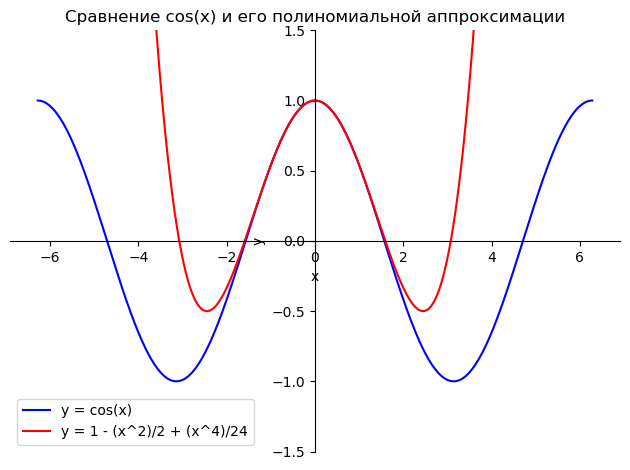

In [42]:
from sympy import symbols, cos, plot
from sympy.plotting import plot as sympy_plot

x = symbols("x")

# Функция косинуса и его аппроксимация Тейлора (до x^4, так как cos(x) — чётная функция)
y_cos = cos(x)
y_poly = 1 - x**2 / 2 + x**4 / 24 # Разложение Тейлора для cos(x) около 0

# Построение графиков
p = plot(
    y_cos, y_poly,
    (x, -2 * 3.1416, 2 * 3.1416),
    ylim = (-1.5, 1.5),
    title = "Сравнение cos(x) и его полиномиальной аппроксимации",
    xlabel = "x",
    ylabel = "y",
    legend = True,
    show = False,
)

p[0].line_color = "blue"
p[0].label = "y = cos(x)"

p[1].line_color = "red"
p[1].label = "y = 1 - (x^2)/2 + (x^4)/24"

p.show()

Может возникнуть следующая ошибка. Например, что-то вроде этого:

```
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[20], line 17
     14 p[1].line_color = "red"
     15 p[1].label = "y = x - x^3/6 + x^5/120"
---> 17 p.show()

File ~\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sympy\plotting\backends\textbackend\text.py:14, in TextBackend.show(self)
     12     return
     13 if len(self._series) != 1:
---> 14     raise ValueError(
     15         'The TextBackend supports only one graph per Plot.')
     16 elif not isinstance(self._series[0], LineOver1DRangeSeries):
     17     raise ValueError(
     18         'The TextBackend supports only expressions over a 1D range')

ValueError: The TextBackend supports only one graph per Plot.
```

Ошибка возникает из-за того, что в данном примере используется _TextBackend_, который поддерживает только один график на один вызов функции `plot()`. Это может происходить, если SymPy не может найти установленный графический бэкенд, например, **Matplotlib**. В последующей работе будут подробно рассмотрены возможности этой библиотеки. Сейчас для корректной работы `plot()` из SymPy **Matplotlib** можно установить, например, с помощью пакетного менеджера **pip**: 

```shell
python -m pip install matplotlib
```

## Задания

1. Задать выражение
$$3-5\left(\frac{1}{2}-1\right)+0.3-x+y^2+\frac{x+2}{1+10^{-2}},$$
вывести его на экран. Выражение не упрощать.

2. Конвертировать выражение в $\LaTeX$. Отобразить результат в Markdown.

3. Задать произвольные значения переменным $х$ и $у$ и пересчитать выражение, вывести полученное значение на экран.

4. Упростить выражение
$$\left(\frac{2a}{2a+b}-\frac{4a^2}{4a^2+4ab+b^2}\right)\cdot\left(\frac{2a}{4a^2-b^2}+\frac{1}{b-2a}\right)^{-1}+\frac{8a^2}{2a+b}.$$


5. Раскрыть скобки в выражениях
   $\dfrac{\left(x+1\right)^3}{\left(x+2\right)^2},$
   $\sin(x+y).$

6. Задать два вещественных числа $a$, $b$. Оперируя символьными выражениями, последовательно вычислить:
$$x=\frac{e^{-|a|^{1.2}}+\sin\left(a^4-b\right)}{ab},$$
$$y=\frac{\cos\left(a^4-b\right)+\arctan(a)}{b+x},$$
$$z=\frac{\sqrt{\arctan^2{x}+1}}{\left(1+x^2\right)^\frac{3}{2}}.$$

Результат вывести в консоль.

7. Задать две функции, зависящие от $x$:
$$y\left(x\right)=\sin\left(x\right),$$
$$y\left(x\right)=x-\frac{x^3}{6}+\frac{x^5}{120}$$.

Вычислить их значения в точках $x=0$, $x=\dfrac{\pi}{6}$, $x=\dfrac{\pi}{4}$, $x=\dfrac{\pi}{2}$.

8. Построить графики функций из задания 7. Графики построить отдельно и оба на одних осях.

9. Заданы уравнения двух пересекающихся прямых на плоскости:
$$y=k_1 x+b_1,$$
$$y=k_2 x+b_2.$$
Найти угол между ними, используя формулу
$$\tan(\varphi)=\frac{k_2-k_1}{1+k_1 k_2}.$$
Выразить $\varphi$ и перевести в градусы.

10. Найти решение уравнения:
$$x^3-9x^2+23x-15=0.$$
Подставить найденные корни в уравнение и убедиться, что получается верное равенство.
Проверить корни графически: построить график левой части уравнения.

11. Найти максимальное и минимальное значение левой части уравнения из задания 10 на интервале $[1, 5]$.

12. Решить уравнение $x=\cos(x)$.
Сначала графически, потом численно.

13. Решить систему двух уравнений
$$\left\{\begin{matrix}
2x+y=3,\\
4x+3y=7.
\end{matrix}\right.$$
Найти корни и проверить их графически.

14. Решить неравенство
$$\frac{3(x+4)}{x^2+2}<5+x-x^2.$$

15. Вычислить пределы
$$\lim_{x\rightarrow\infty}\left(\frac{x^2-x}{x+5}-\frac{x^3+2x}{x^2-3}\right),\quad \lim_{x\rightarrow\infty}\left(1+\frac{x-3}{x^2+4}\right)^{x},\quad \lim_{x\rightarrow 1}\frac{\sin{\pi x}}{\ln{x}}.$$

16. Задать произвольную функцию $z$ от двух переменных $х$ и $у$. Найти ее производные:
- по $х$, по $у$, по $х$ и $у$;
- найти любую третью производную;
- найти производную высокого порядка.

17. Взять неопределенные интегралы
$$\int\frac{\ln x}{x\sqrt{1+\ln x}}dx,\quad \int\frac{dx}{3\sin^2{x}-8\sin{x}\cos{x}+5\cos^2{x}}.$$

18. Взять определенные интегралы
$$\int_{0}^{2\pi}\frac{dx}{(2+\cos x)(3+\cos x)}dx,\quad \int_0^{\infty}\frac{\arctan x}{\left(1+x^2\right)^{\frac{3}{2}}}dx.$$